<a href="https://colab.research.google.com/github/Prasad0505/Company_Funding_EDA_Project/blob/main/EDA_of_Company.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import The Basic Libraries:**

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
df=pd.read_csv("/content/drive/MyDrive/CSVFiles/companies.csv")
df.head()

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
0,/organization/-fame,#fame,http://livfame.com,Media,10000000,operating,IND,16,Mumbai,Mumbai,1,NaN,2015-01-05,2015-01-05
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,700000,operating,USA,DE,DE - Other,Delaware City,2,2014-09-04,2014-03-01,2014-10-14
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,3406878,operating,NaN,NaN,NaN,NaN,1,NaN,2014-01-30,2014-01-30
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,2000000,operating,CHN,22,Beijing,Beijing,1,2007-01-01,2008-03-19,2008-03-19
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,-,operating,USA,IL,"Springfield, Illinois",Champaign,1,2010-01-01,2014-07-24,2014-07-24


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   permalink          66368 non-null  object
 1   name               66367 non-null  object
 2   homepage_url       61310 non-null  object
 3   category_list      63220 non-null  object
 4   funding_total_usd  66368 non-null  object
 5   status             66368 non-null  object
 6   country_code       59410 non-null  object
 7   state_code         57821 non-null  object
 8   region             58338 non-null  object
 9   city               58340 non-null  object
 10  funding_rounds     66368 non-null  int64 
 11  founded_at         51147 non-null  object
 12  first_funding_at   66344 non-null  object
 13  last_funding_at    66368 non-null  object
dtypes: int64(1), object(13)
memory usage: 7.1+ MB


In [10]:
df.describe(include='all')

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
count,66368,66367,61310,63220,66368,66368,59410,57821,58338,58340,66368.000000,51147,66344,66368
unique,66368,66102,61191,27296,18896,4,137,311,1092,5111,NaN,3978,4817,4518
top,/organization/-fame,Blink,http://www.askforoffer.com,Software,-,operating,USA,CA,SF Bay Area,San Francisco,NaN,2012-01-01,2014-01-01,2014-01-01
freq,1,4,5,3995,12785,53034,37601,12900,8804,3526,NaN,2730,565,483
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.732522,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.360251,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,NaN


**Converting Funding _tota_usd Column into Float dataType:**

In [11]:
df['funding_total_usd'].value_counts()

-           12785
1000000      1147
100000        983
500000        979
2000000       820
            ...  
41370920        1
10548260        1
146071          1
1917766         1
14851           1
Name: funding_total_usd, Length: 18896, dtype: int64

In [12]:
def myfun(value):
    if(value=='-'):
       return np.nan
    else:
       value=float(value)
       return value

df['funding_total_usd']=df['funding_total_usd'].apply(myfun)


**Filling Null Values With median Value:**

In [13]:
df['funding_total_usd'].median()

2000000.0

In [14]:
df['funding_total_usd'].fillna(df['funding_total_usd'].median(),inplace=True)
df['funding_total_usd'].isnull().sum()

0

In [15]:
df.head()

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
0,/organization/-fame,#fame,http://livfame.com,Media,10000000.0,operating,IND,16,Mumbai,Mumbai,1,NaN,2015-01-05,2015-01-05
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,700000.0,operating,USA,DE,DE - Other,Delaware City,2,2014-09-04,2014-03-01,2014-10-14
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,3406878.0,operating,NaN,NaN,NaN,NaN,1,NaN,2014-01-30,2014-01-30
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,2000000.0,operating,CHN,22,Beijing,Beijing,1,2007-01-01,2008-03-19,2008-03-19
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,2000000.0,operating,USA,IL,"Springfield, Illinois",Champaign,1,2010-01-01,2014-07-24,2014-07-24


**Using Dataprep For EDA:**

In [16]:
!pip install dataprep

# Restart the runtime 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 41.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 764.7/764.7 KB 43.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 52.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 60.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 49.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.6/133.6 KB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 54.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.5/101.5 KB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 66.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.7/232.7 KB 27.4

DataPrep Report
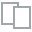
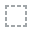
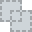
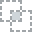
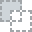
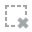
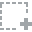
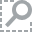
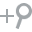
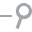
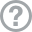
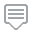
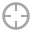
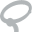
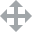
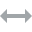
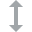
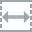
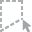
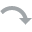
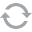
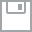
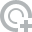
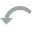
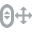
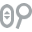
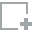
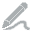
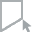
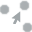
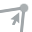
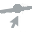

In [17]:
import pandas as pd
from dataprep.eda import create_report
create_report(df)

**Filling The Null values in Country_code Column with its Mode:**

In [18]:
df['country_code'].unique()

array(['IND', 'USA', nan, 'CHN', 'HKG', 'CAN', 'CHL', 'GBR', 'FRA', 'AUS',
       'DNK', 'ROM', 'AUT', 'KOR', 'NLD', 'SWE', 'JPN', 'RUS', 'SGP',
       'NOR', 'COL', 'ESP', 'BEL', 'IRL', 'ITA', 'ISR', 'NZL', 'CZE',
       'DEU', 'CHE', 'BRA', 'BGR', 'SVN', 'JOR', 'HUN', 'BWA', 'NGA',
       'FIN', 'TUR', 'IDN', 'ARE', 'CYP', 'POL', 'CRI', 'PRT', 'ARG',
       'TWN', 'KHM', 'THA', 'SVK', 'UKR', 'LTU', 'ISL', 'ZAF', 'MEX',
       'VEN', 'URY', 'MUS', 'KEN', 'PHL', 'MNE', 'VNM', 'GHA', 'PSE',
       'MYS', 'PER', 'EGY', 'PAN', 'LVA', 'GGY', 'ALB', 'UGA', 'HRV',
       'EST', 'LBN', 'GRC', 'PAK', 'NPL', 'LUX', 'SAU', 'IRN', 'GTM',
       'BAH', 'ARM', 'BGD', 'MDA', 'SRB', 'TUN', 'ZWE', 'BRB', 'NIC',
       'TAN', 'PRI', 'TTO', 'BHR', 'CMR', 'BLR', 'CYM', 'BRN', 'ECU',
       'SLV', 'MLT', 'ZMB', 'MKD', 'GIB', 'TGO', 'LAO', 'BMU', 'HND',
       'MCO', 'MMR', 'KAZ', 'QAT', 'DOM', 'MAR', 'LIE', 'GEO', 'MOZ',
       'DZA', 'JAM', 'KNA', 'AZE', 'SEN', 'RWA', 'DMA', 'UZB', 'BLZ',
       'OMN', '

In [19]:
b=df['country_code'].mode()
b[0]

'USA'

In [20]:
df['country_code'].fillna(b[0],inplace=True)


In [21]:
df['country_code'].isnull().sum()

0

In [22]:
df.isnull().sum()

permalink                0
name                     1
homepage_url          5058
category_list         3148
funding_total_usd        0
status                   0
country_code             0
state_code            8547
region                8030
city                  8028
funding_rounds           0
founded_at           15221
first_funding_at        24
last_funding_at          0
dtype: int64

**Filling The Null values in City Column with its Mode:**

In [23]:
a=df['city'].mode()
a[0]

'San Francisco'

In [24]:
df['city'].fillna(a[0],inplace=True)

In [25]:
df['city'].isnull().sum()

0

**Filling The Null values in founded_At Column with its Mode:**

In [26]:
c=df['founded_at'].mode()
c[0]

'2012-01-01'

In [27]:
df['founded_at'].fillna(c[0],inplace=True)

In [28]:
df['founded_at'].isnull().sum()

0

**Filling The Null values in first_funding_at Column with its Mode:**

In [29]:
d=df['first_funding_at'].mode()
d[0]

'2014-01-01'

In [30]:
df['first_funding_at'].fillna(d[0],inplace=True)

In [31]:
df['first_funding_at'].isnull().sum()

0

In [32]:
df.isnull().sum()

permalink               0
name                    1
homepage_url         5058
category_list        3148
funding_total_usd       0
status                  0
country_code            0
state_code           8547
region               8030
city                    0
funding_rounds          0
founded_at              0
first_funding_at        0
last_funding_at         0
dtype: int64

**Filling The Null values in Category_list Column with its Mode:**

In [33]:
e=df['category_list'].mode()
e[0]

'Software'

In [34]:
df['category_list'].fillna(e[0],inplace=True)

**Droping The Unnecessary Columns:**

In [35]:
df.drop(['permalink'],axis=1,inplace=True)
df.drop(['homepage_url'],axis=1,inplace=True)
df.drop(['region'],axis=1,inplace=True)
df.drop(['state_code'],axis=1,inplace=True)

**Droping The Duplicates Values:**

In [36]:
df.drop_duplicates(inplace=True)
df.shape

(66367, 10)

In [37]:
percent_missing = df.isnull().sum() * 100 / len(df)


In [38]:
percent_missing

name                 0.001507
category_list        0.000000
funding_total_usd    0.000000
status               0.000000
country_code         0.000000
city                 0.000000
funding_rounds       0.000000
founded_at           0.000000
first_funding_at     0.000000
last_funding_at      0.000000
dtype: float64

In [39]:
df

,name,category_list,funding_total_usd,status,country_code,city,funding_rounds,founded_at,first_funding_at,last_funding_at
0,#fame,Media,10000000.0,operating,IND,Mumbai,1,2012-01-01,2015-01-05,2015-01-05
1,:Qounter,Application Platforms|Real Time|Social Network...,700000.0,operating,USA,Delaware City,2,2014-09-04,2014-03-01,2014-10-14
2,"(THE) ONE of THEM,Inc.",Apps|Games|Mobile,3406878.0,operating,USA,San Francisco,1,2012-01-01,2014-01-30,2014-01-30
3,0-6.com,Curated Web,2000000.0,operating,CHN,Beijing,1,2007-01-01,2008-03-19,2008-03-19
4,004 Technologies,Software,2000000.0,operating,USA,Champaign,1,2010-01-01,2014-07-24,2014-07-24
...,...,...,...,...,...,...,...,...,...,...
66363,ZZNode Science and Technology,Enterprise Software,1587301.0,operating,CHN,Beijing,1,2012-01-01,2012-04-01,2012-04-01
66364,Zzzzapp Wireless ltd.,Advertising|Mobile|Web Development|Wireless,114304.0,operating,HRV,Split,4,2012-05-13,2011-11-01,2014-03-01
66365,ÁERON,Software,2000000.0,operating,USA,San Francisco,1,2011-01-01,2014-08-01,2014-08-01
66366,Ôasys,Consumer Electronics|Internet of Things|Teleco...,18192.0,operating,USA,San Francisco,1,2014-01-01,2015-01-01,2015-01-01


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66367 entries, 0 to 66367
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               66366 non-null  object 
 1   category_list      66367 non-null  object 
 2   funding_total_usd  66367 non-null  float64
 3   status             66367 non-null  object 
 4   country_code       66367 non-null  object 
 5   city               66367 non-null  object 
 6   funding_rounds     66367 non-null  int64  
 7   founded_at         66367 non-null  object 
 8   first_funding_at   66367 non-null  object 
 9   last_funding_at    66367 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 5.6+ MB


**Making Category_list less than 1000 in frequency as others:**

In [41]:
category_list=df['category_list'].value_counts()

In [42]:
category_less_than_1000=category_list[category_list<1000]

In [43]:
category_less_than_1000

Hardware + Software                                                            932
Health Care                                                                    930
Games                                                                          862
Enterprise Software                                                            845
Manufacturing                                                                  773
                                                                              ... 
Consumer Internet|Marketplaces|Mobile|Mobile Payments|Transportation|Travel      1
Apps|Mobile|Private Social Networking                                            1
Cloud Computing|Enterprise Software|Infrastructure|PaaS|Social Media             1
Content|SaaS|Social Media Marketing|Software                                     1
Consumer Goods|E-Commerce|Internet                                               1
Name: category_list, Length: 27290, dtype: int64

In [44]:
def handel_cateory_list(value):
   if value in category_less_than_1000:
      return 'others'
   else:
      return value

df['category_list']=df['category_list'].apply(handel_cateory_list)
df['category_list'].value_counts()
      

others              50918
Software             7142
Biotechnology        3615
E-Commerce           1332
Mobile               1177
Clean Technology     1133
Curated Web          1050
Name: category_list, dtype: int64

**Making City less than 100 in frequency as others:**

In [45]:
city=df['city'].value_counts()

In [46]:
city_less_than100=city[city<100]

In [47]:
def handel_city(value):
   if value in city_less_than100:
      return 'others'
   else:
      return value

df['city']=df['city'].apply(handel_city)
df['city'].value_counts()
      

others           25490
San Francisco    11554
New York          3164
London            1917
Austin             774
                 ...  
Ottawa             111
Charlotte          107
Lexington          106
Melbourne          102
Milan              101
Name: city, Length: 91, dtype: int64

**Making Country less than 1000 in frequency as others:**

In [48]:
country_code=df['country_code'].value_counts()

In [49]:
country_code_less_than1000=country_code[country_code<1000]

In [50]:
def handel_country_code(value):
   if value in country_code_less_than1000:
      return 'others'
   else:
      return value

df['country_code']=df['country_code'].apply(handel_country_code)
df['country_code'].value_counts()
      

USA       44558
others    10839
GBR        3688
CAN        1925
IND        1596
CHN        1544
FRA        1135
DEU        1082
Name: country_code, dtype: int64

**We are starting with visuslization**

**Visualizing The Country_code Column:**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

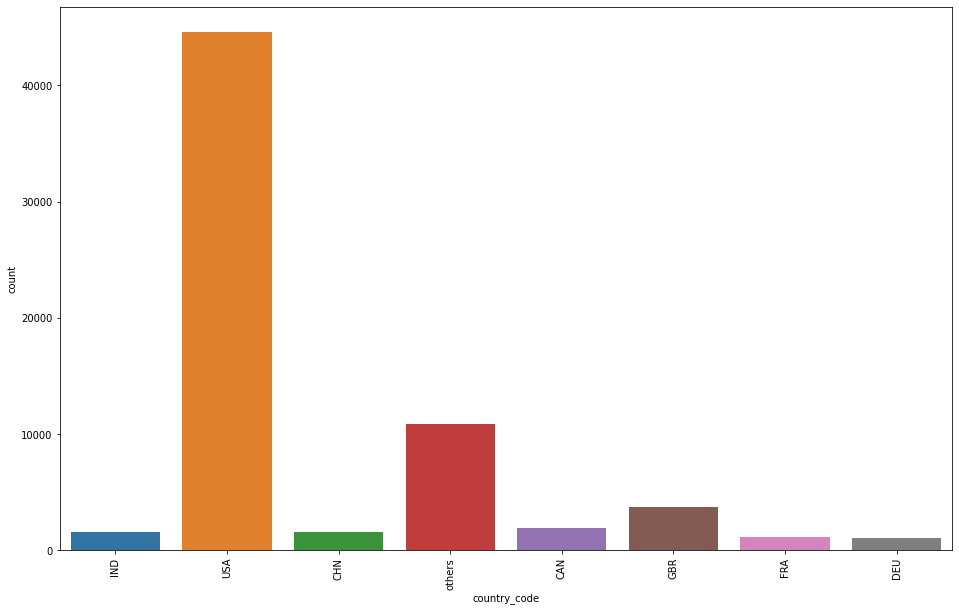

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(16,10))
bx=sns.countplot(df['country_code'])
plt.xticks(rotation=90)
#plt.savefig("location and restarant.jpg")

**Visualizing The City Column:**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90]), <a list of 91 Text major ticklabel objects>)

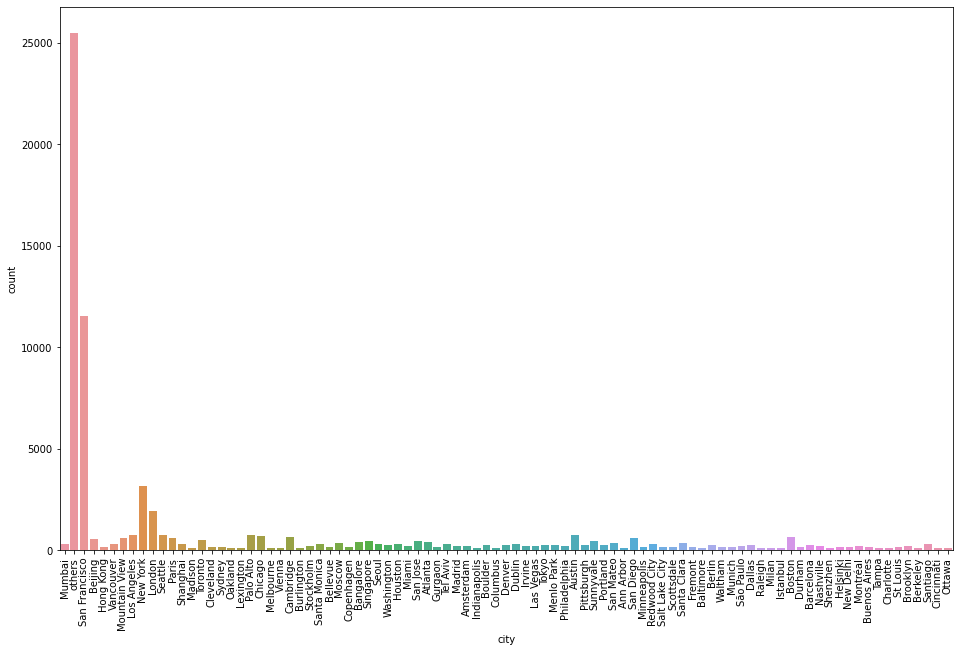

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(16,10))
ax=sns.countplot(df['city'])
plt.xticks(rotation=90)
#plt.savefig("location and restarant.jpg")

**Visualizing The Funding_Round Column:**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]), <a list of 19 Text major ticklabel objects>)

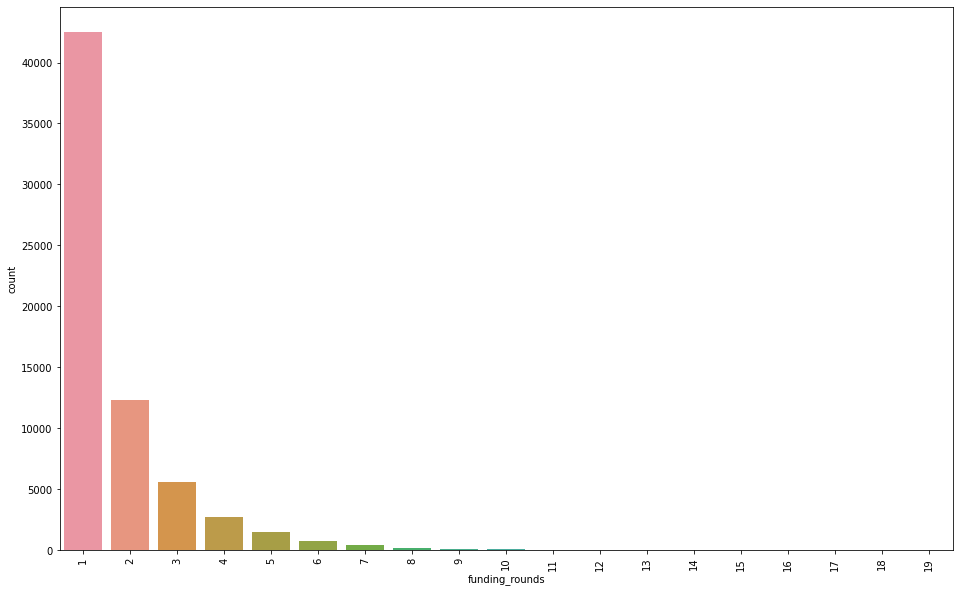

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(16,10))
cx=sns.countplot(df['funding_rounds'])
plt.xticks(rotation=90)
#plt.savefig("location and restarant.jpg")

**Visualizing The Category_list Column:**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

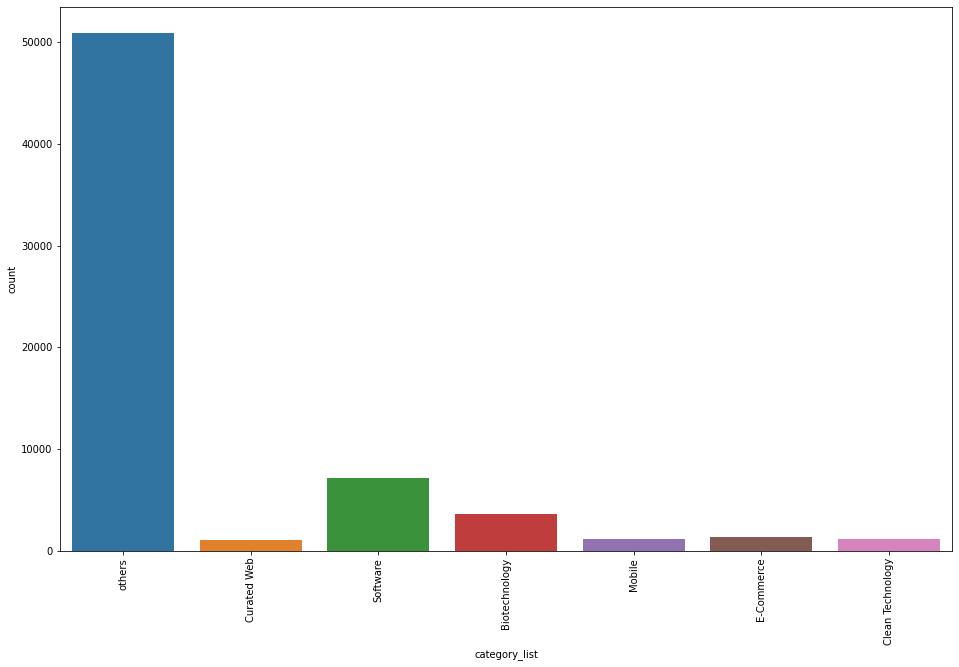

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(16,10))
cx=sns.countplot(df['category_list'])
plt.xticks(rotation=90)
#plt.savefig("location and restarant.jpg")

**Visualizing The Status Column:**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

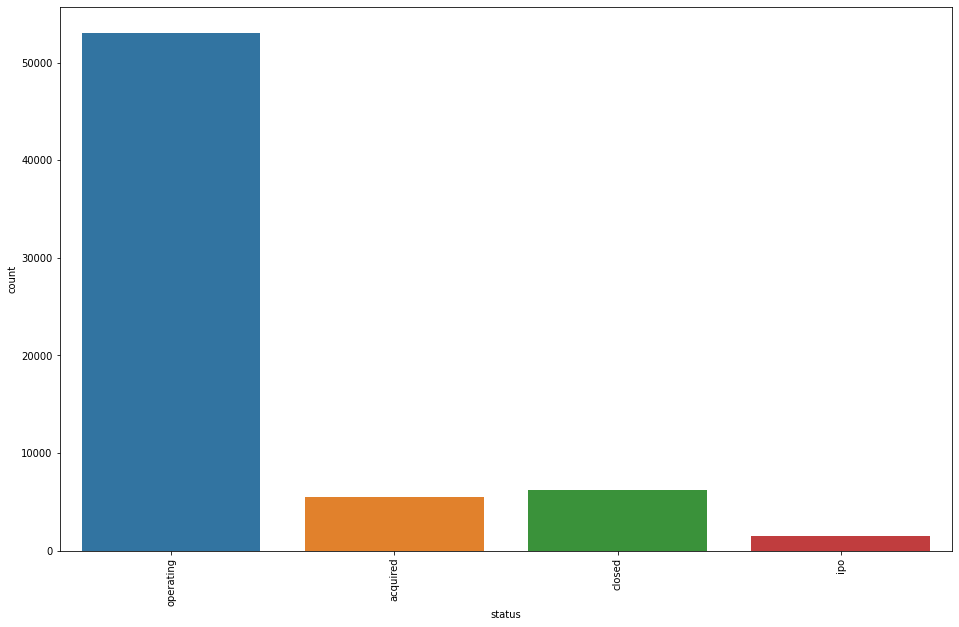

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(16,10))
ax=sns.countplot(df['status'])
plt.xticks(rotation=90)
#plt.savefig("location and restarant.jpg")

Visualizing The **Category_list** verses **funding_total_usd** Column:

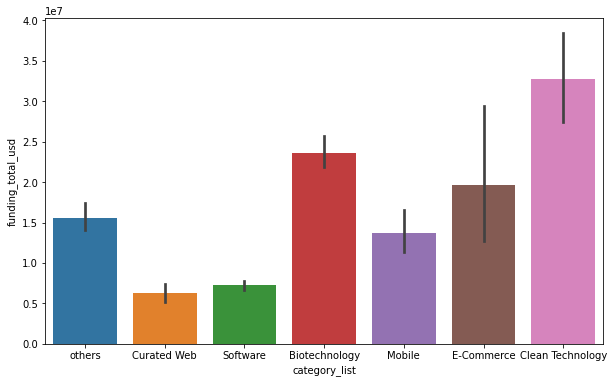

In [56]:
plt.figure(figsize=(10,6))
sns.barplot(x='category_list',y='funding_total_usd',data=df)
#plt.savefig("onlinevsrate.jpg")


Visualizing The **Status** verses **funding_total_usd** Column:

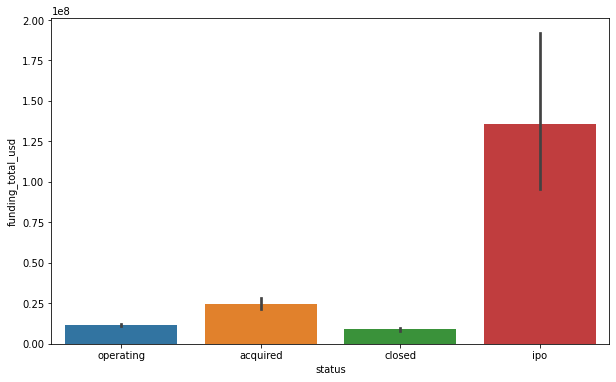

In [57]:
plt.figure(figsize=(10,6))
sns.barplot(x='status',y='funding_total_usd',data=df)
#plt.savefig("onlinevsrate.jpg")


Visualizing The **Country_code** verses **funding_total_usd** Column:

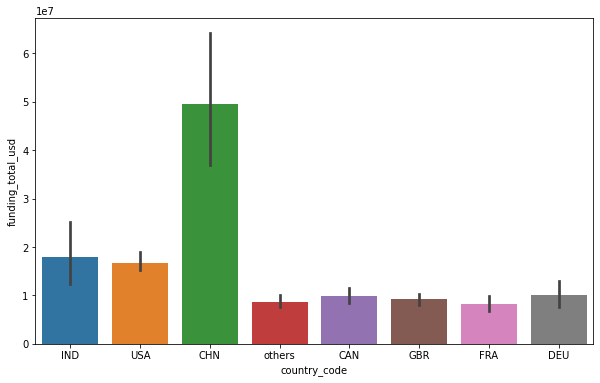

In [58]:
plt.figure(figsize=(10,6))
sns.barplot(x='country_code',y='funding_total_usd',data=df)
#plt.savefig("onlinevsrate.jpg")


Visualizing The **City** verses **funding_total_usd** Column:

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90]), <a list of 91 Text major ticklabel objects>)

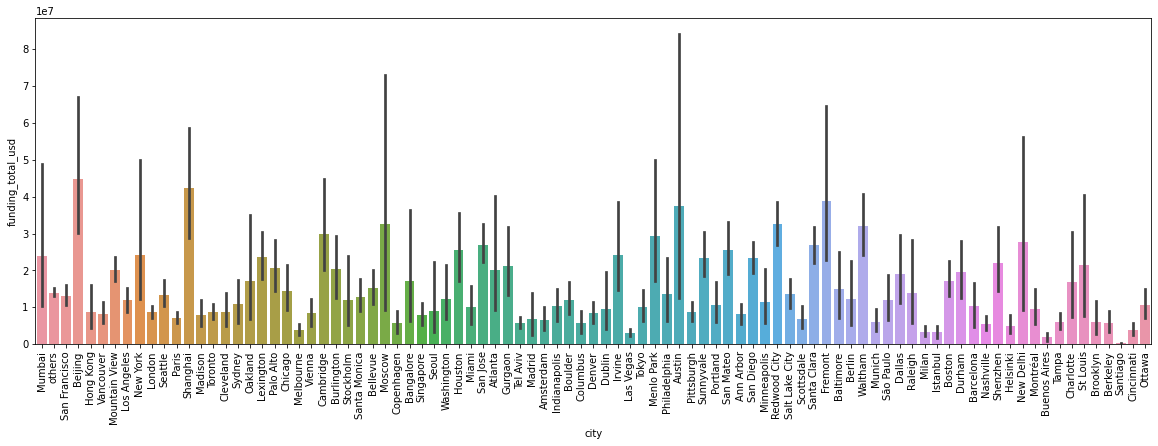

In [59]:
plt.figure(figsize=(20,6))
sns.barplot(x='city',y='funding_total_usd',data=df)
plt.xticks(rotation=90)
#plt.savefig("onlinevsrate.jpg")


Visualizing The **Funding_Rounds** verses **funding_total_usd** Column:

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]), <a list of 19 Text major ticklabel objects>)

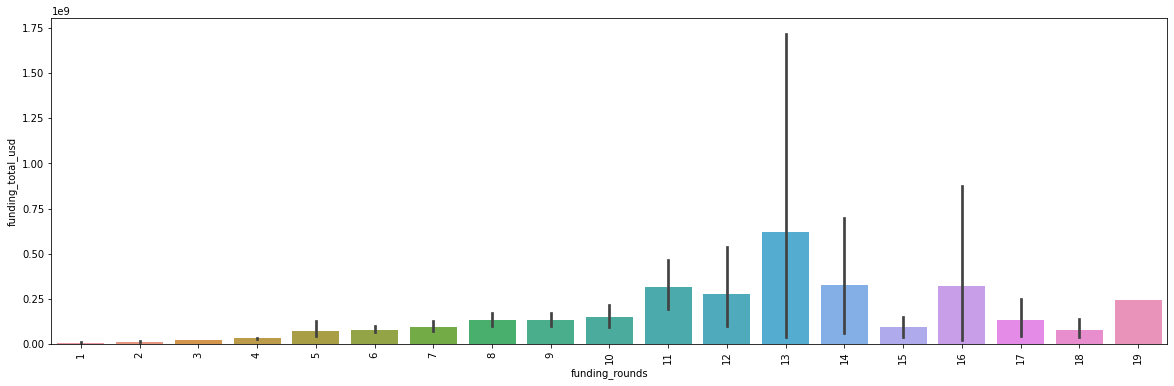

In [60]:
plt.figure(figsize=(20,6))
sns.barplot(x='funding_rounds',y='funding_total_usd',data=df)
plt.xticks(rotation=90)
#plt.savefig("onlinevsrate.jpg")


**Location Wise Status of Status of Companies:**

In [61]:
df1=df.groupby(['country_code','status'])['name'].count()
df1.to_csv('location_online.csv')
df1=pd.read_csv('location_online.csv')
df1=pd.pivot_table(df1,values=None,index=['country_code'],columns=['status'],fill_value=0,aggfunc=np.sum)
df1

name                       
status       acquired closed   ipo operating
country_code                                
CAN               156    158    81      1530
CHN                33     66    81      1364
DEU                90     77    14       901
FRA                71     91    19       954
GBR               227    281    32      3148
IND                49     69    11      1467
USA              4456   4557  1149     34395
others            467    938   160      9274

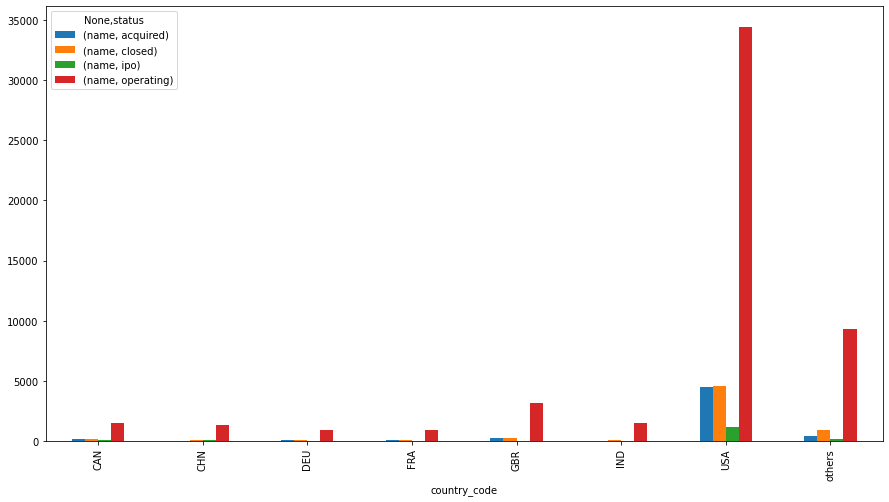

In [62]:
df1.plot(kind='bar',figsize=(15,8))
#plt.savefig("onlineorderlocationwise.jpg")

**Category Wise Status of Companies:**

In [63]:
df2=df.groupby(['category_list','status'])['name'].count()
df2.to_csv('category_list_status.csv')
df2=pd.read_csv('category_list_status.csv')
df2=pd.pivot_table(df2,values=None,index=['category_list'],columns=['status'],fill_value=0,aggfunc=np.sum)
df2

name                       
status           acquired closed   ipo operating
category_list                                   
Biotechnology         266    238   303      2808
Clean Technology       67    110    33       923
Curated Web           158    206     9       677
E-Commerce             88     99    21      1124
Mobile                144    105    23       905
Software              648   1279    76      5139
others               4178   4200  1082     41457

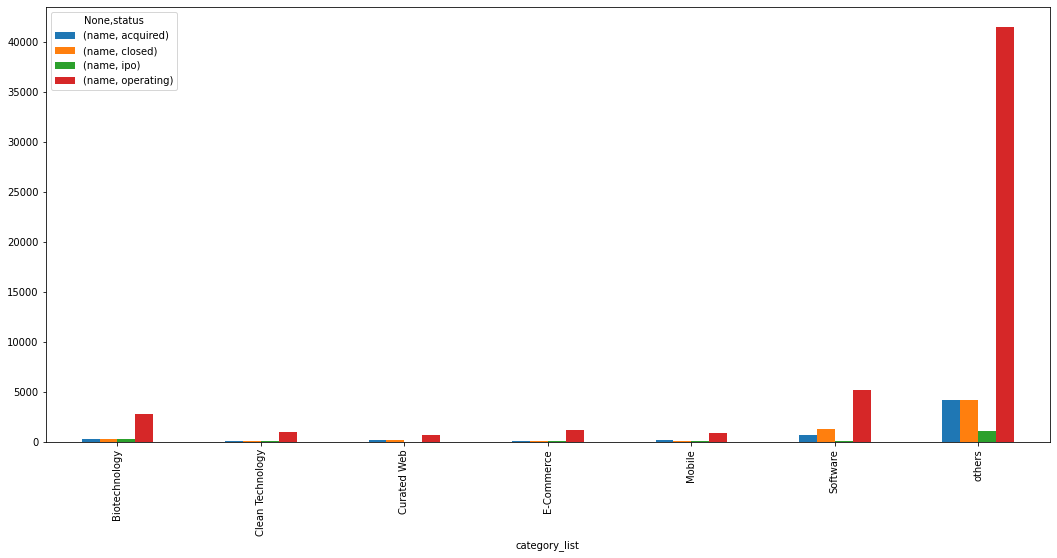

In [64]:
df2.plot(kind='bar',figsize=(18,8))

**Category Wise Funding Rounds:**

In [65]:

df3=df.groupby(['category_list','funding_rounds'])['name'].count()
df3.to_csv('category_list_funding_rounds.csv')
df3=pd.read_csv('category_list_funding_rounds.csv')
df3=pd.pivot_table(df3,values=None,index=['category_list'],columns=['funding_rounds'],fill_value=0,aggfunc=np.sum)
df3

name                                                     \
funding_rounds       1     2     3     4     5    6    7    8   9   10  11   
category_list                                                                
Biotechnology      1724   811   434   256   158  103   50   33  19  14   4   
Clean Technology    696   197    81    76    41   16    8    8   2   3   2   
Curated Web         729   188    77    31    17    3    1    1   2   1   0   
E-Commerce          891   254    89    42    34    9    6    2   2   0   1   
Mobile              681   261   121    60    22   14    6    3   4   0   3   
Software           5567   911   359   154    72   34   24    8   3   4   1   
others            32182  9731  4445  2120  1124  595  323  159  94  57  40   

                                            
funding_rounds    12  13 14 15 16 17 18 19  
category_list                               
Biotechnology      3   3  2  1  0  0  0  0  
Clean Technology   1   0  0  1  0  1  0  0  
Curated Web        0   0  0  0  0  0  0  0  
E-Commerce         2   0  0  0  0  0  0  0  
Mobile             0   2  0  0  0  0  0  0  
Software           1   0  2  1  1  0  0  0  
others            21  10  2  3  5  2  3  1

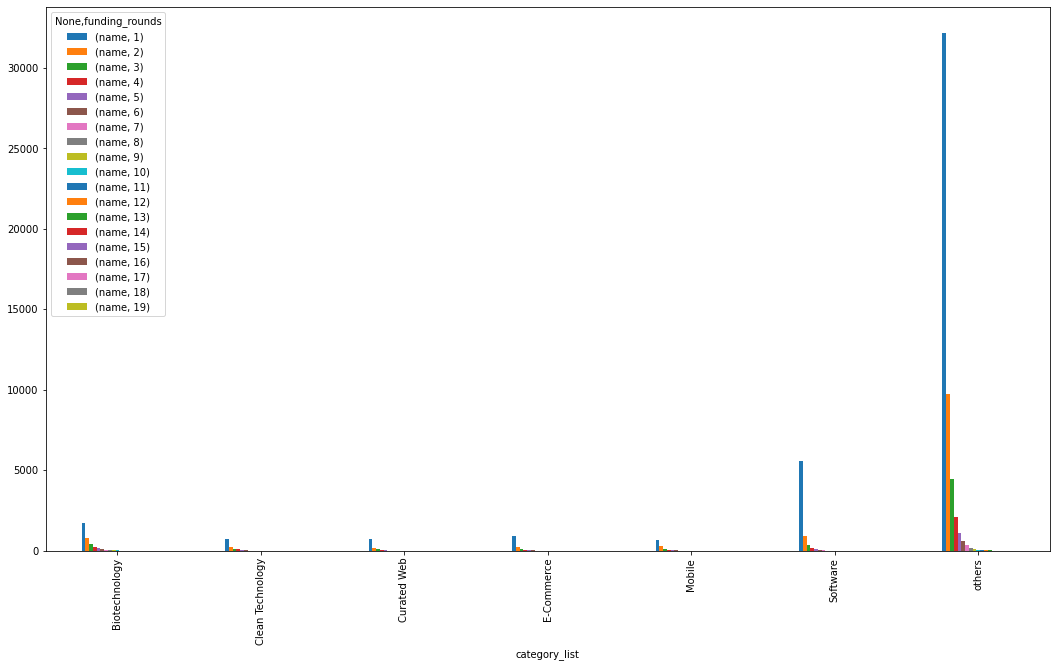

In [66]:
df3.plot(kind='bar',figsize=(18,10))

**Country Wise Category List of Companies:**

In [67]:
df4=df.groupby(['country_code','category_list'])['name'].count()
df4.to_csv('country_code_category_list.csv')
df4=pd.read_csv('country_code_category_list.csv')
df4=pd.pivot_table(df4,values=None,index=['country_code'],columns=['category_list'],fill_value=0,aggfunc=np.sum)
df4

name                                                 \
category_list Biotechnology Clean Technology Curated Web E-Commerce Mobile   
country_code                                                                 
CAN                     126               65          21         25     35   
CHN                      43               27          22        135    101   
DEU                      70               23          15         35     15   
FRA                      63               18          19         28     20   
GBR                     196               85          56         66     60   
IND                      17               23          24         78     27   
USA                    2771              744         757        658    749   
others                  329              148         136        307    170   

                               
category_list Software others  
country_code                   
CAN                181   1472  
CHN                111   1105  
DEU                111    813  
FRA                153    834  
GBR                302   2923  
IND                118   1309  
USA               5345  33533  
others             821   8928

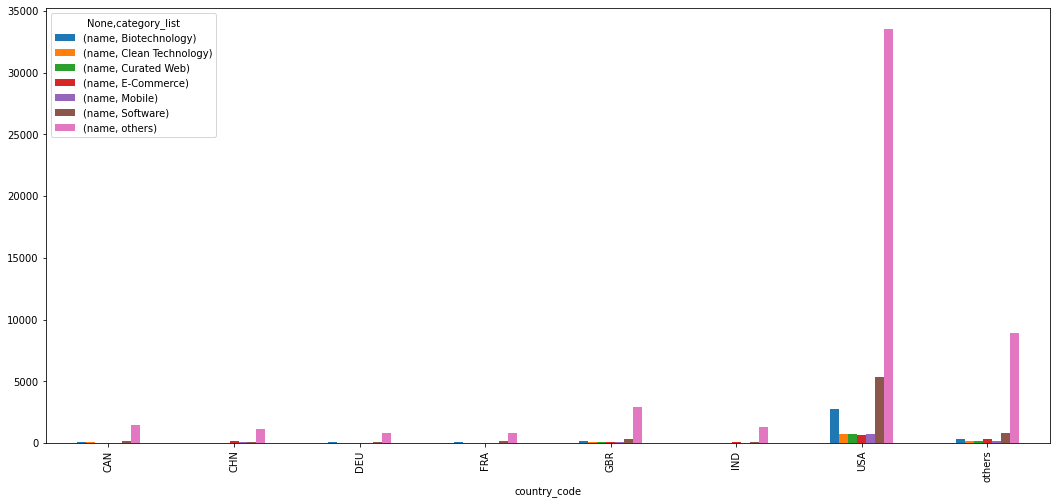

In [68]:
df4.plot(kind='bar',figsize=(18,8))

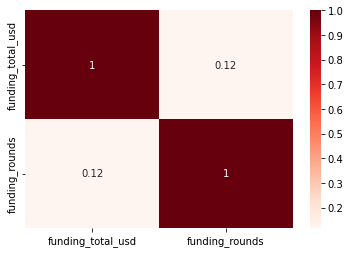

In [69]:
df[['funding_total_usd','funding_rounds']].corr()
sns.heatmap(df[['funding_total_usd','funding_rounds']].corr(),annot=True,cmap='Reds')
plt.show()